In [1]:
import msc_python_packages.py_post as pyp
import marc_python_tools.posttools.marc_t16_post_tools as mpt
import marc_python_tools.posttools.tensor_math as mtm
import pandas as pd
%pylab inline
plt.style.use(r'\\fil-ask-004\python\mplstyle\4subsea.mplstyle')

Populating the interactive namespace from numpy and matplotlib


In [2]:
filename=r"C:\projects\21_1993_Pierce_fatigue_MARC\analysis\NOV_8inch_GIR_3p_with_bs_g3_job1.t16"
#filename=r"C:\projects\21_1993_Pierce_fatigue_MARC\analysis\NOV_8inch_GIR_3p_with_bs_g2_job1.h5"

#filename=r"C:\projects\21_1993_Pierce_fatigue_MARC\analysis\NOV_8inch_GIR_3p_with_bs_g3_mod_sep_stress_job1.t16"

p=pyp.post_open(filename)

increments=mpt.extract_increments(p)
conectivity=mpt.nodal_connectivity_table(p)
scalars=mpt.extract_result_scalars(p)
sets=mpt.extract_sets(p)

In [245]:
increments

[{'index': 1, 'increment': 0, 'time': 0.0, 'title': 'job1'},
 {'index': 2, 'increment': 1, 'time': 0.20000000298023224, 'title': 'lcase1'},
 {'index': 3, 'increment': 2, 'time': 0.4000000059604645, 'title': 'lcase1'},
 {'index': 4, 'increment': 3, 'time': 0.6000000238418579, 'title': 'lcase1'},
 {'index': 5, 'increment': 4, 'time': 0.800000011920929, 'title': 'lcase1'},
 {'index': 6, 'increment': 5, 'time': 1.0, 'title': 'lcase1'},
 {'index': 7, 'increment': 6, 'time': 1.2000000476837158, 'title': 'lcase2'},
 {'index': 8, 'increment': 7, 'time': 1.399999976158142, 'title': 'lcase2'},
 {'index': 9, 'increment': 8, 'time': 1.600000023841858, 'title': 'lcase2'},
 {'index': 10, 'increment': 9, 'time': 1.7999999523162842, 'title': 'lcase2'},
 {'index': 11, 'increment': 10, 'time': 2.0, 'title': 'lcase2'},
 {'index': 12, 'increment': 11, 'time': 2.003499984741211, 'title': 'lcase3'},
 {'index': 13, 'increment': 12, 'time': 2.006999969482422, 'title': 'lcase3'},
 {'index': 14, 'increment': 13

In [246]:
print([dictionary['name'] for dictionary in sets])

['Inner_liner_outer', 'Inner_liner_inner', 'C6_clip_outer', 'C6_clip_inner', 'IL_1_outer', 'IL_1_inner', 'First_armor_layer_outer', 'First_armor_layer_inner', 'IL_2_outer', 'IL_2_inner', 'Second_armor_layer_outer', 'Second_armor_layer_inner', 'IL_3_outer', 'IL_3_inner', 'fix_start_nodes', 'fix_end_nodes', 'IP_298bar_faces', 'exseg1_faces', 'exseg2_faces', 'exseg3_faces', 'inner_wire_nodes', 'OP_1bar_faces', 'axial_force_75kN_nodes', 'end_cap_298bar_nodes']


In [247]:
f3=pd.DataFrame(sets)
#print(f3)index
f3.head(50)
#print(f3['name'])

,name,type,number_of_items,items
0,Inner_liner_outer,face,3600,"[3605, 3606, 3607, 3608, 3609, 3610, 3611, 361..."
1,Inner_liner_inner,face,3600,"[3605, 3606, 3607, 3608, 3609, 3610, 3611, 361..."
2,C6_clip_outer,face,3600,"[10028921, 10028924, 10028927, 10028930, 10028..."
3,C6_clip_inner,face,3600,"[10028923, 10028926, 10028929, 10028932, 10028..."
4,IL_1_outer,face,3600,"[10809, 10810, 10811, 10812, 10813, 10814, 108..."
5,IL_1_inner,face,3600,"[10809, 10810, 10811, 10812, 10813, 10814, 108..."
6,First_armor_layer_outer,face,11040,"[14411, 14412, 14413, 14414, 14415, 14416, 144..."
7,First_armor_layer_inner,face,11040,"[14411, 14412, 14413, 14414, 14415, 14416, 144..."
8,IL_2_outer,face,3600,"[25453, 25454, 25455, 25456, 25457, 25458, 254..."
9,IL_2_inner,face,3600,"[25453, 25454, 25455, 25456, 25457, 25458, 254..."


# Extract axial stresses for inner TA layer

In [4]:
increments_df=pd.DataFrame(increments)
number_of_inc=len(increments_df.index)

number_of_inc

71

In [249]:
increments_df=pd.DataFrame(increments)
number_of_inc=len(increments_df.index)

new_sets = {d['name']: d for d in sets}
nodes=new_sets['inner_wire_nodes']['items']

for n in range (1, number_of_inc+1, 1):

    p.moveto(n)

    stresses_inner_ta=[]
    
    for i, node in enumerate(nodes):
    
        stresses_inner_ta.append({"inc":n-1,"node":nodes[i],"stress":mpt.extract_node_result(conectivity,scalars,'Comp 33 of Cauchy Stress in Preferred Sys',p,nodes[i])}) 
      
    stresses_inner_ta=pd.DataFrame(stresses_inner_ta)

    stresses_inner_ta.to_csv(f'stresses_inner_ta_inc_{n-1}.csv')
#    stresses_inner_ta.to_csv(f'stresses_inner_ta_mod_sep_stress_inc_{n-1}.csv')
        
    del stresses_inner_ta



# Extract initial node cordinates

In [226]:

# Get initial position of all nodes
node_coord = mpt.get_node_initial_pos(p)
#node_coord.head(5)

# Extract nodes from a specific node set

inner_ta_nodes_list = sets[20]['items']
inner_ta_nodes_list_df = node_coord[node_coord['node_id'].isin(inner_ta_nodes_list)].reset_index(drop=True)

inner_ta_nodes_list_df.to_csv('inner_ta_nodes_list_df.csv')

inner_ta_nodes_list_df.head(10)

,node_id,node_index,X,Y,Z
0,115249,14563,-8.424541,137.041290,0.000000
1,115250,14564,-8.423037,131.029541,0.000000
2,115253,14565,8.424541,137.041290,0.000000
3,115256,14566,8.423037,131.029541,0.000000
4,115259,14567,4.101970,137.238464,24.030516
5,115262,14568,3.630361,131.249588,24.030516
6,115265,14569,17.418983,136.190308,17.197342
7,115268,14570,16.947855,130.201401,17.197342
8,115270,14571,14.857686,136.493256,44.644447
9,115272,14572,13.917607,130.559814,44.644447


In [103]:
# Show specific nodes
#node_coord.query('node_id == 143796')
#node_coord.query('143796 <= node_id <= 143799')

# Combine dataframes

In [250]:
from pathlib import Path

file_dir = Path(r'C:\projects\21_1993_Pierce_fatigue_MARC\jupyter_notebook')

for n in range (1, number_of_inc+1, 1):
  
    stresses=pd.read_csv(file_dir / f'stresses_inner_ta_inc_{n-1}.csv')
#    stresses=pd.read_csv(file_dir / f'stresses_inner_ta_mod_sep_stress_inc_{n-1}.csv')
    
    stresses = stresses.loc[:, ~stresses.columns.str.contains("Unnamed: 0")]

    stresses['z_coord']=inner_ta_nodes_list_df['Z']

    stresses.to_csv(f'stresses_inner_ta_inc_{n-1}_mod.csv')
#    stresses.to_csv(f'stresses_inner_ta_mod_sep_stress_inc_{n-1}_mod.csv')

    del stresses

    


# Get maximum stress

In [251]:

l=4947.34
dl=20.6139
e=3.5
times=l/dl

max_a=[]

for n in range (1, number_of_inc+1, 1):

    kalle=pd.read_csv(file_dir / f'stresses_inner_ta_inc_{n-1}_mod.csv')
#    kalle=pd.read_csv(file_dir / f'stresses_inner_ta_mod_sep_stress_inc_{n-1}_mod.csv')
    
    for m in range (0, 241, 1):
    
        dz=dl*m
    
        a=kalle[(kalle['z_coord'] > dz-e) & (kalle['z_coord'] < dz+e)]

        b=a['stress'].max()
    
        max_a.append({"inc":n-1,"z_pos":dz,"stress":b}) 

   
max_a=pd.DataFrame(max_a)  

max_a.to_csv('max_stress.csv')
#max_a.to_csv('max_stress_mod_sep_stress.csv')

max_a


,inc,z_pos,stress
0,0,0.0000,0.000000
1,0,20.6139,0.000000
2,0,41.2278,0.000000
3,0,61.8417,0.000000
4,0,82.4556,0.000000
...,...,...,...
17106,70,4864.8804,225.864204
17107,70,4885.4943,231.793213
17108,70,4906.1082,268.236656
17109,70,4926.7221,234.090450


In [274]:
results=pd.read_csv(r'C:\projects\21_1993_Pierce_fatigue_MARC\jupyter_notebook\max_stress.csv')
#results=pd.read_csv(r'C:\projects\21_1993_Pierce_fatigue_MARC\jupyter_notebook\max_stress_mod_sep_stress.csv')

results_mod=results[results['inc'] == 61]

results_mod.to_csv('max_stress_one_inc.csv')

results_mod

,Unnamed: 0,inc,z_pos,stress
14701,14701,61,0.0000,192.031372
14702,14702,61,20.6139,196.851585
14703,14703,61,41.2278,195.067909
14704,14704,61,61.8417,191.531738
14705,14705,61,82.4556,188.318237
...,...,...,...,...
14937,14937,61,4864.8804,226.660782
14938,14938,61,4885.4943,229.183289
14939,14939,61,4906.1082,242.998680
14940,14940,61,4926.7221,225.940308


# Plot max axial wire stress

71

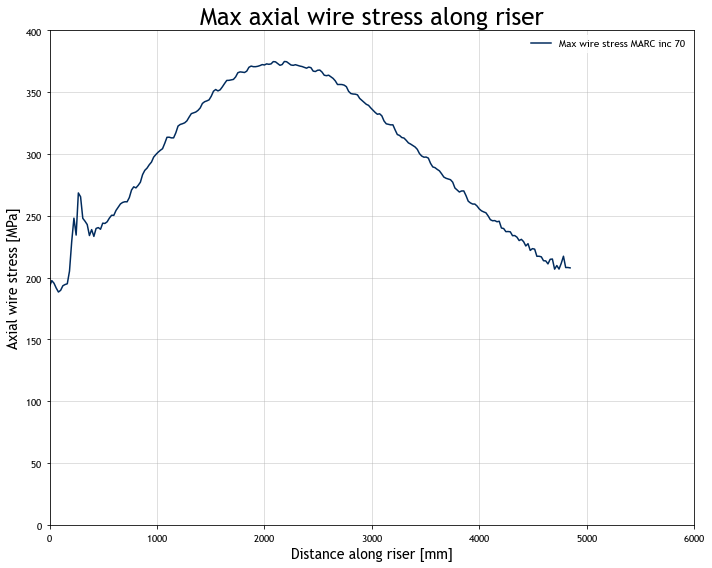

In [39]:
results=pd.read_csv(r'C:\projects\21_1993_Pierce_fatigue_MARC\jupyter_notebook\max_stress.csv')
#results=pd.read_csv(r'C:\projects\21_1993_Pierce_fatigue_MARC\jupyter_notebook\max_stress_mod_sep_stress.csv')


plt.figure(figsize=(10,8))

#for n in range (52, number_of_inc, 1):
for n in range (70, 71, 1):
#for n in range (0, 71, 2):
    
    results_mod=results[results['inc'] == n]

    plt.plot(results_mod['z_pos'][0:-5],results_mod['stress'][0:-5],label=f'Max wire stress MARC inc {n}',linestyle='-')

plt.legend(loc=0)
plt.xlim([0.,6000.])
plt.ylim([0.,400.])
plt.xlabel('Distance along riser [mm]',fontsize = 14)
plt.ylabel('Axial wire stress [MPa]',fontsize = 14)
plt.title('Max axial wire stress along riser',fontsize = 24)

plt.tight_layout()

number_of_inc

71

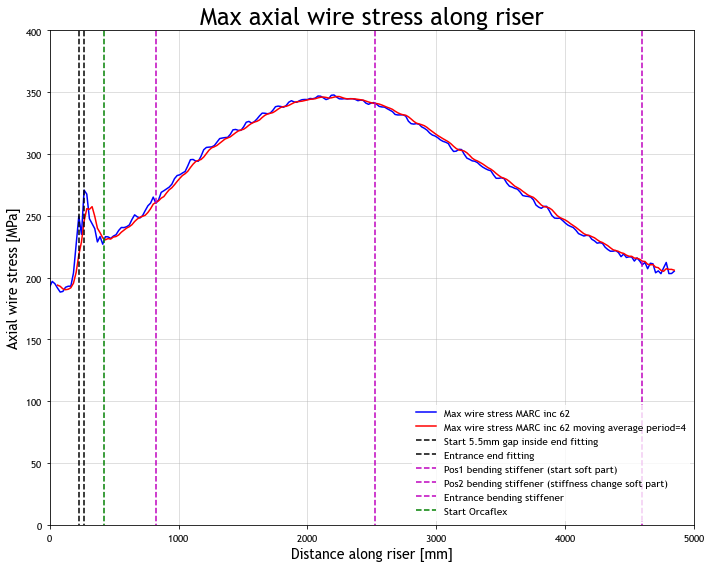

In [63]:
results=pd.read_csv(r'C:\projects\21_1993_Pierce_fatigue_MARC\jupyter_notebook\max_stress.csv')
results_1=pd.read_csv(r'C:\projects\21_1993_Pierce_fatigue_MARC\jupyter_notebook\max_stress_mod_sep_stress.csv')

plt.figure(figsize=(10,8))

n=62

#55

results_mod=results[results['inc'] == n]
results_mod.to_csv('results_mod.csv')

results_mod_1=results_1[results_1['inc'] == n]
results_mod_1.to_csv('results_mod_1.csv')

# moving avarage 

results_mod_ma=pd.read_csv(r'C:\projects\21_1993_Pierce_fatigue_MARC\jupyter_notebook\results_mod.csv')

results_mod_ma = results_mod_ma.loc[:, ~results_mod_ma.columns.str.contains("Unnamed: 0")]

results_mod_ma['moving average'] = results_mod_ma.iloc[:,2].rolling(window=4).mean()

results_mod_ma.to_csv('results_mod_ma.csv')

#

results_mod_ma_1=pd.read_csv(r'C:\projects\21_1993_Pierce_fatigue_MARC\jupyter_notebook\results_mod_1.csv')

results_mod_ma_1 = results_mod_ma_1.loc[:, ~results_mod_ma_1.columns.str.contains("Unnamed: 0")]

results_mod_ma_1['moving average'] = results_mod_ma_1.iloc[:,2].rolling(window=4).mean()

results_mod_ma_1.to_csv('results_mod_ma_1.csv')

#results_ma_1.head

plt.plot(results_mod['z_pos'][0:-5],results_mod['stress'][0:-5],label=f'Max wire stress MARC inc {n}',linestyle='-',color='b')
plt.plot(results_mod_ma['z_pos'][0:-5],results_mod_ma['moving average'][0:-5],label=f'Max wire stress MARC inc {n} moving average period=4',linestyle='-',color='r')

#plt.plot(results_mod_1['z_pos'][0:-5],results_mod_1['stress'][0:-5],label=f'Max wire stress MARC inc {n} mod sep stress',linestyle='--',color='b')
#plt.plot(results_mod_ma_1['z_pos'][0:-5],results_mod_ma_1['moving average'][0:-5],label=f'Max wire stress MARC inc {n} mod sep stress, moving average period=4',linestyle='--',color='r')


plt.plot([265,265],[500,0.0],label='Start 5.5mm gap inside end fitting',linestyle='--',color='black')
plt.plot([230,230],[500,0.0],label='Entrance end fitting',linestyle='--',color='black')
plt.plot([825,825],[500,0.0],label='Pos1 bending stiffener (start soft part)',linestyle='--',color='m')
plt.plot([2525,2525],[500,0.0],label='Pos2 bending stiffener (stiffness change soft part)',linestyle='--',color='m')
plt.plot([4594,4594],[500,0.0],label='Entrance bending stiffener',linestyle='--',color='m')
plt.plot([425,425],[500,0.0],label='Start Orcaflex',linestyle='--',color='green')

plt.legend(loc=0)
plt.xlim([0.,5000.])
plt.ylim([0.,400.])
plt.xlabel('Distance along riser [mm]',fontsize = 14)
plt.ylabel('Axial wire stress [MPa]',fontsize = 14)
plt.title('Max axial wire stress along riser',fontsize = 24)

plt.tight_layout()

number_of_inc

In [60]:
#results_end_node=pd.read_clipboard()
#results_end_node.to_csv('results_end_node.csv')
results_end_node=pd.read_csv('results_end_node.csv',index_col=0)

In [62]:
results_end_node

,Time,Displacement Y Node 3,Time.1,Displacement Z Node 3,Time.2,Rotation X Node 3
0,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000e+00
1,0.2000,-0.000128,0.2000,0.072308,0.2000,3.638795e-08
2,0.4000,-0.000129,0.4000,0.134411,0.4000,2.460365e-08
3,0.6000,-0.000099,0.6000,0.196296,0.6000,2.451367e-08
4,0.8000,-0.000121,0.8000,0.258339,0.8000,2.840880e-08
...,...,...,...,...,...,...
66,2.3248,-773.521729,2.3248,-87.522881,2.3248,2.974774e-01
67,2.3311,-788.129211,2.3311,-91.095238,2.3311,3.033572e-01
68,2.3374,-802.673523,2.3374,-94.730103,2.3374,3.092522e-01
69,2.3437,-817.240295,2.3437,-98.445503,2.3437,3.151386e-01
